# kütüphaneler

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as moh
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from torchvision.datasets import ImageFolder

from torchvision import transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler

from sklearn.metrics import confusion_matrix



#  Data yükleme

In [2]:
from pathlib import Path  

path = Path('C:/Users/hp/Desktop/hhh/haz/minet')

target_label = ['Altin','Gumus','biotite', 'bornite', 'chrysocolla', 'malachite','muscovite', 'pyrite', 'quartz']

# Eğer CUDA kullanılabilirse, cihazı CUDA'ya ayarla, aksi halde CPU'ya ayarla.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
# Verilerin yüklenmesi ve tensörlere dönüştürülmesi
'''
Verileri tensörlere dönüştürüyoruz çünkü 
ana çerçevelerle uyumlu olmaları,
gelişmiş performans sağlamaları ve
model geliştirmeyi daha verimli hale getirmeleridir.
'''
dataset = ImageFolder(path, transform=transforms.ToTensor())
print('Data boyutu: ', len(dataset))
classes = dataset.classes

Data boyutu:  1189


# Veri kümesinin örneklerini küçük resim biçiminde görüntüleme

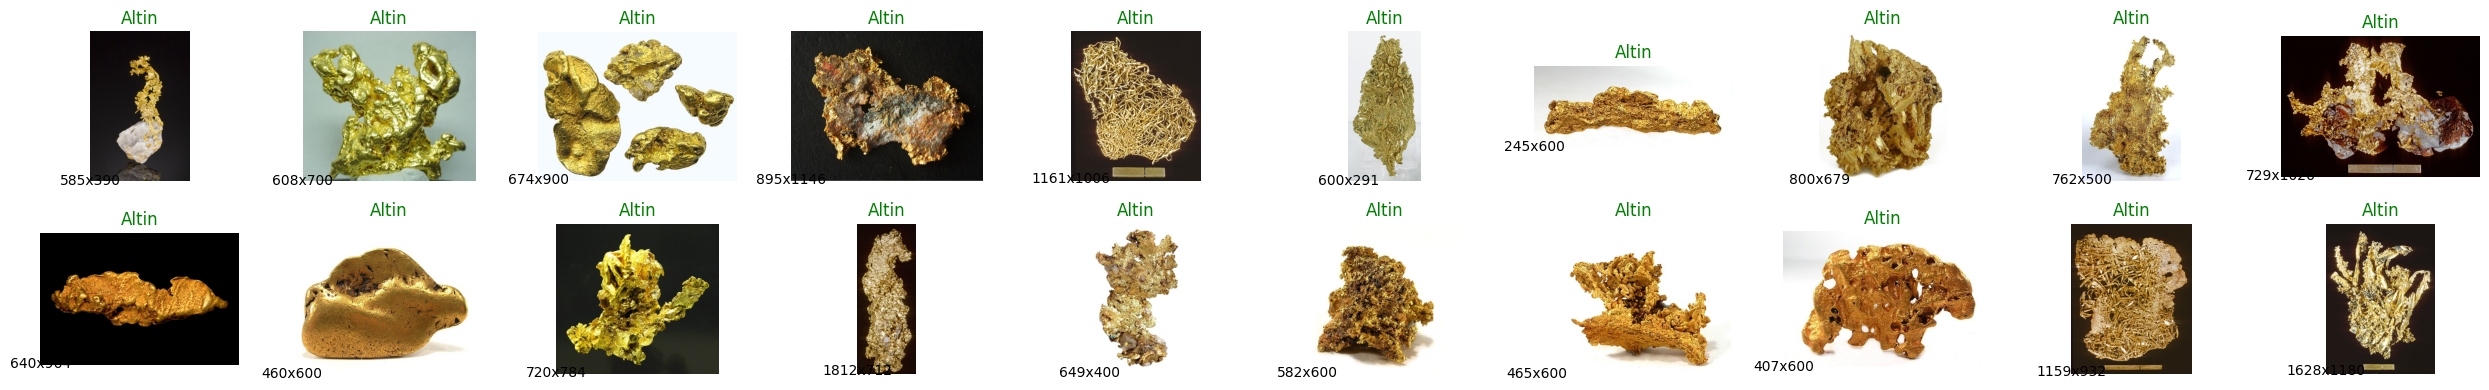

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(25, 4))

for idx in range(20):
    image, label = dataset[idx]
    ax = axes[idx // 10, idx % 10]
    ax.imshow(image.permute(1, 2, 0))
    ax.set_title(target_label[label], color='green')
    ax.axis('off')
    ax.text(0, image.shape[1] + 10, f"{image.shape[1]}x{image.shape[2]}", fontsize=10, ha='center')

plt.tight_layout()
plt.show()

### Analiz

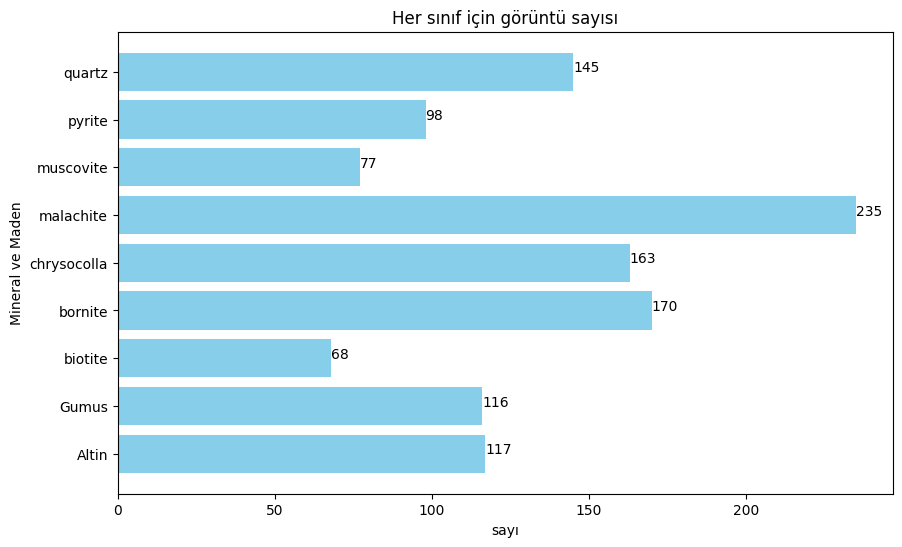

,Mineral ve Maden,sayisi
0,Altin,117
1,Gumus,116
2,biotite,68
3,bornite,170
4,chrysocolla,163
5,malachite,235
6,muscovite,77
7,pyrite,98
8,quartz,145


In [5]:
#Bir veri kümesindeki örneklerin farklı sınıflara dağılımını analiz etmek icin

count = {}
for i in range(len(dataset)):
    _, label = dataset[i]
    label_name = target_label[label]
    count[label_name] = count.get(label_name, 0) + 1

# Verilerin görüntülenmesi için DataFrame 
df = pd.DataFrame(count.items(), columns=['Mineral_Maden', 'sayi'])

# Veri grafiği
plt.figure(figsize=(10, 6))
plt.barh(df['Mineral_Maden'], df['sayi'], color='skyblue')
plt.xlabel('sayı')
plt.ylabel('Mineral ve Maden')
plt.title('Her sınıf için görüntü sayısı')

for index, value in enumerate(df['sayi']):
    plt.text(value, index, str(value))

plt.show()
count = {}

for i in range(len(dataset)):
    _, labels = dataset[i]
    label = target_label[labels]
    if label not in count:
        count[label] = 1
    elif label in count:
        count[label] += 1

df = pd.DataFrame(count, index=np.arange(1))
df = df.transpose().reset_index()
df.columns = ['Mineral ve Maden', 'sayisi']
df




### veri kümesindeki görsellerin boyutlarını analiz eder, görsellerin maksimum, minimum ve ortalama yükseklik ve genişliğini hesaplar

In [6]:
from torchvision.datasets import ImageFolder

# Bu fonksiyon, bir veri kümesindeki görüntülerin boyutlarını alır.
def get_image_dimensions(dataset):
    heights = []
    widths = []
    for image_tensor, _ in dataset:
        height, width = image_tensor.shape[1:]
        heights.append(height)
        widths.append(width)
    return heights, widths

# Bu fonksiyon, verilen yükseklik ve genişlik listelerinin istatistiklerini yazdırır.
def print_image_dimensions(heights, widths):
    max_height = np.max(heights)
    min_height = np.min(heights)
    mean_height = np.mean(heights)
    max_width = np.max(widths)
    min_width = np.min(widths)
    mean_width = np.mean(widths)

    print(f"Maximum Height (Yükseklik): {max_height}\t Minimum Height (Yükseklik): {min_height}\t Mean Height (Ortalama Yükseklik) : {mean_height}")
    print(f"Maximum Width ( Genişlik ): {max_width}\t Minimum Width  ( Genişlik ): {min_width}\t Mean Width  ( Ortalama Genişlik ) : {mean_width}")

def main():
    dataset = ImageFolder(path, transform=transforms.ToTensor())
    print('Data size (boyutu): ', len(dataset))

    heights, widths = get_image_dimensions(dataset)
    print_image_dimensions(heights, widths)

if __name__ == "__main__":
    main()


Data size (boyutu):  1189
Maximum Height (Yükseklik): 6016	 Minimum Height (Yükseklik): 129	 Mean Height (Ortalama Yükseklik) : 722.820857863751
Maximum Width ( Genişlik ): 6016	 Minimum Width  ( Genişlik ): 144	 Mean Width  ( Ortalama Genişlik ) : 927.86543313709


### Görüntü veri kümesine belirli dönüşümler uygulama ve belirtilen sayıda dönüştürülmüş görüntüyü görüntüleme

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

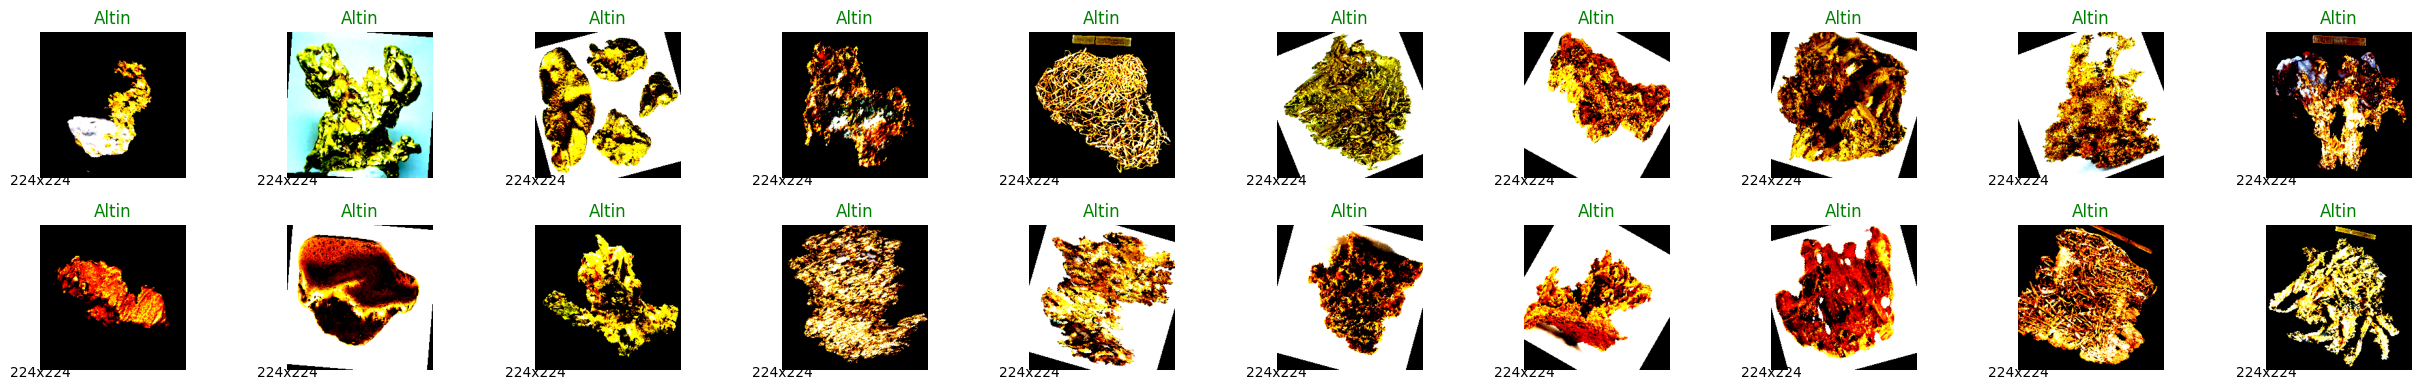

In [7]:
from torchvision import transforms

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),# Görüntü boyutunu yeniden boyutlandır
    transforms.RandomRotation(30),# Rastgele döndürme uygula
    transforms.RandomVerticalFlip(p=0.5),# Rastgele dikey çevirme uygula
    transforms.RandomHorizontalFlip(p=0.5),# Rastgele yatay çevirme uygula
    transforms.ToTensor(),# Görüntüleri tensörlere dönüştür
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])# Normalize et
])

# Veri kümesine dönüşümleri uygulamak icin
def apply_transforms(dataset, transform):
    transformed_dataset = dataset
    transformed_dataset.transform = transform
    return transformed_dataset

def display_images(dataset, num_images=20):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(25, 4))

    for idx in range(num_images):
        image, label = dataset[idx]
        ax = axes[idx // 10, idx % 10]
        ax.imshow(image.permute(1, 2, 0))
        ax.set_title(target_label[label], color='green')
        ax.axis('off')
        ax.text(0, image.shape[1] + 10, f"{image.shape[1]}x{image.shape[2]}", fontsize=10, ha='center')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":     # Dönüşümleri uygulamak icin
    transformed_data = apply_transforms(ImageFolder(path), data_transform)

    display_images(transformed_data)


### Verileri Bölme işlemleri

Training set size: 1072
Validation set size: 60
Testing set size: 57


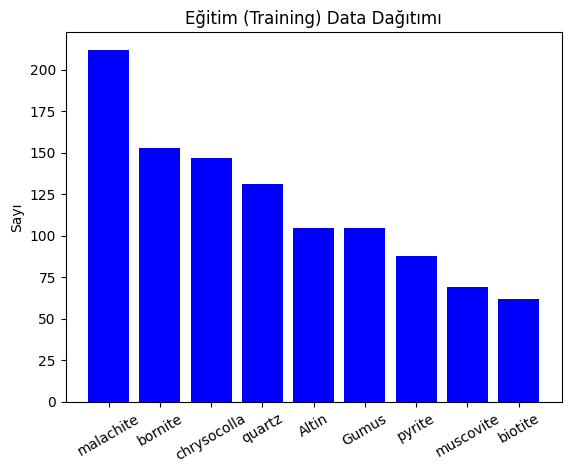

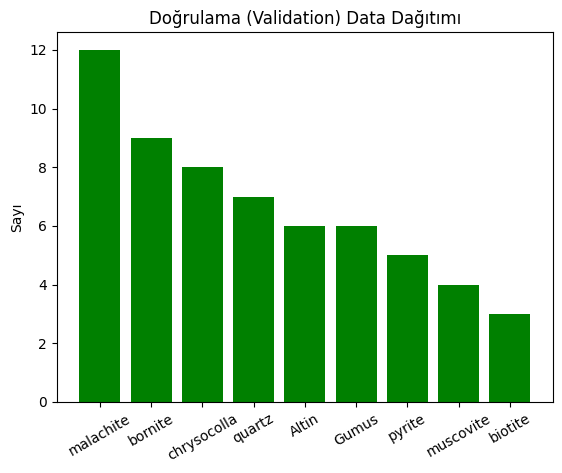

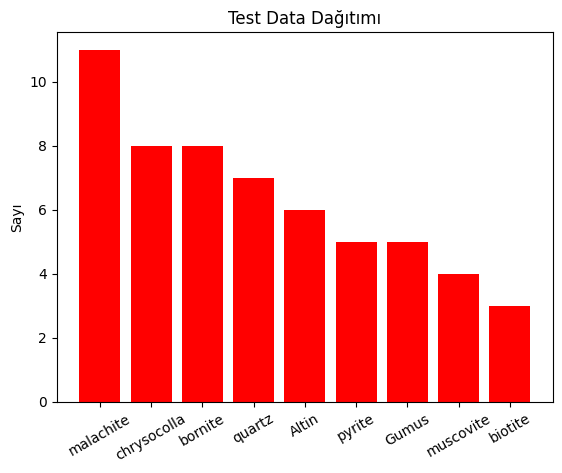

In [8]:
from collections import Counter

def plot_dist(indexes, dataset=dataset):
    """
    Parametreler:
         dizinler (liste): Veri kümesinden dikkate alınacak dizinlerin listesi.
         veri kümesi (Veri Kümesi): Analiz edilecek veri kümesi.
    """
    count = Counter()  

    for i in indexes:
        _, label = dataset[i]
        count[target_label[label]] += 1

    sorted_counts = dict(sorted(count.items(), key=lambda kv: kv[1], reverse=True))

    # Dağılımı çizmek için 
    plt.bar(sorted_counts.keys(), sorted_counts.values())
    plt.xticks(rotation=30)
    plt.title('Data Dağılımı')
    plt.ylabel('Sayı')
    plt.show()

# bir sözlük oluşturma
idx_label = {i: label for i, (_, label) in enumerate(dataset)}

# Veriyi doğrulama için ayırma
x_train, x_val, _, _ = train_test_split(list(idx_label.keys()), list(idx_label.values()), test_size=0.05, stratify=list(idx_label.values()))
x_val = list(x_val) 

# Doğrulama dizinlerini veri kümesinden kaldırma
idx_label_train = {idx: label for idx, label in idx_label.items() if idx not in x_val}

# Eğitim verisini test için ayırma
x_train, x_test, _, _ = train_test_split(list(idx_label_train.keys()), list(idx_label_train.values()), test_size=0.05, stratify=list(idx_label_train.values()))

# # Eğitim, doğrulama ve test setlerinin boyutlarını yazdırma
print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")
print(f"Testing set size: {len(x_test)}")

def plot_dist(indexes, dataset=dataset, color='blue'): 
    count = Counter()
    for i in indexes:
        _, label = dataset[i]
        count[target_label[label]] += 1

    dist_2 = dict(sorted(count.items(), key=lambda kv: kv[1], reverse=True))
    plt.bar(dist_2.keys(), dist_2.values(), color=color) 
    plt.xticks(rotation=30)
    plt.ylabel('Sayı')
    plt.show()

# Her setin dağılımını çizme
plt.title('Eğitim (Training) Data Dağıtımı') 
plot_dist(x_train, color='blue') 

plt.title('Doğrulama (Validation) Data Dağıtımı') 
plot_dist(x_val, color='green') 

plt.title('Test Data Dağıtımı')  
plot_dist(x_test, color='red')  


##### veri kümesini yüklemek ve eğitim, doğrulama ve test kümelerine bölmek için kullanılır ve ardından her bir kümeyi belirli bir toplu iş boyutuyla ve rastgele bir veri örneğiyle yüklemek için DataLoader'ı kullanır.

In [9]:
from torchvision.datasets import ImageFolder

# rastgele 
train_set = SubsetRandomSampler(x_train)
val_set = SubsetRandomSampler(x_val)
test_set = SubsetRandomSampler(x_test)

# Batch boyutu
batch_size = 128

# ImageFolder kullanarak veri yüklemeyi tanımlama
load_data = ImageFolder(path, transform=data_transform)

# DataLoader kullanarak veri yüklemeyi tanımlama
train_loader = DataLoader(load_data, batch_size=batch_size, num_workers=4, sampler=train_set)
val_loader = DataLoader(load_data, batch_size=batch_size, num_workers=4, sampler=val_set)
test_loader = DataLoader(load_data, batch_size=batch_size, num_workers=4, sampler=test_set)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Şekiller: torch.Size([128, 3, 224, 224])


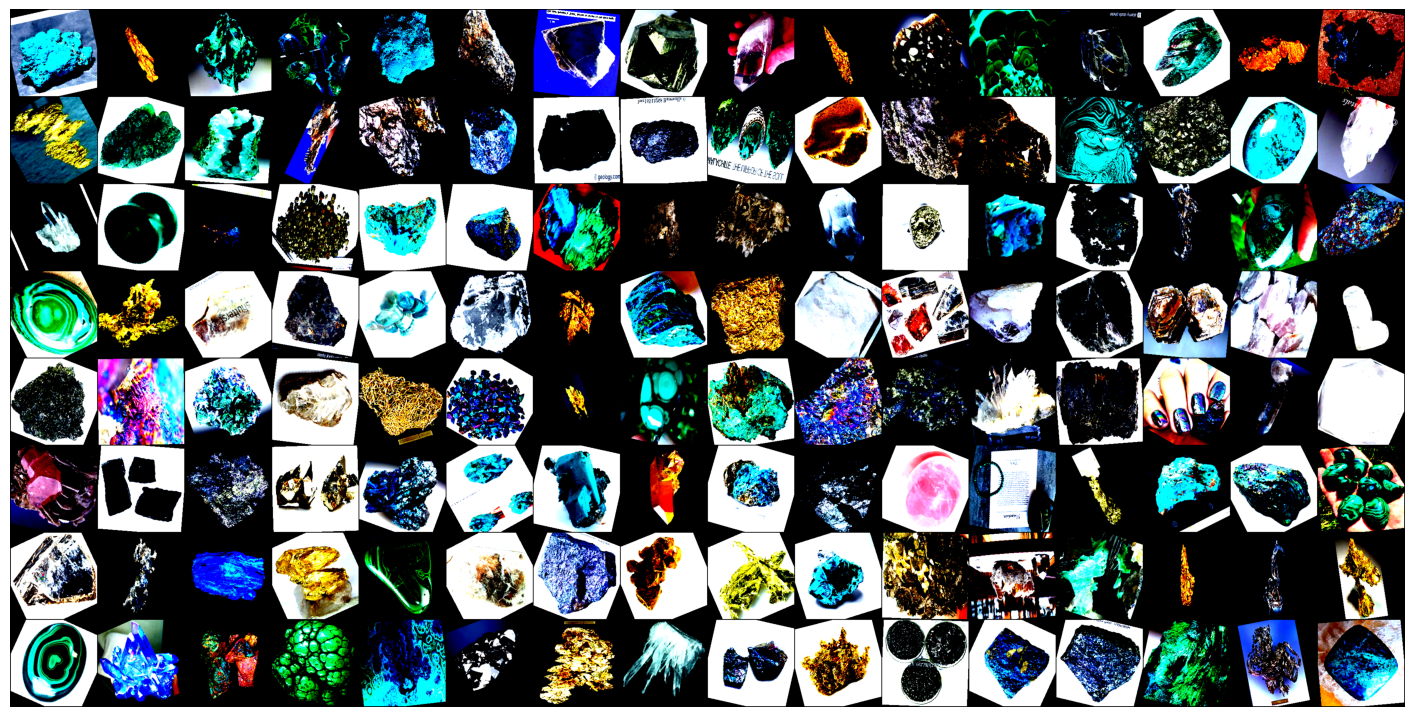

In [10]:
#  eğitim yükleyicisinden bir batch görüntü alır
for images, _ in train_loader:
    print('\n Şekiller:', images.shape)
    plt.figure(figsize=(18,18))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

# Modeli oluşturmak için ön işlemler

 SIZE: 18.0
 w1: 20
--------------------------------------------------
                            Operation  Value
1             Başlangıç ​​Boyutu (w1)   20.0
2              Filtre Boyutu (F_SIZE)    3.0
3         Filter Pool Boyutu (F_POOL)    3.0
4                         Padding (P)    0.0
5       Adım (Stride) Boyutu (S_SIZE)    1.0
6  Adım (Stride) Pool Boyutu (S_POOL)    3.0
7        Çıktı (Output) Boyutu (SIZE)   18.0
8                  Pool Boyutu (POOL)    6.0
9                       Yeni (New) w1    6.0


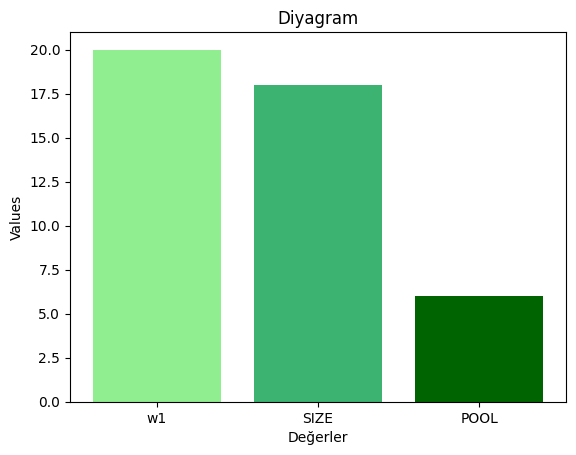

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

'''
veri çerçeveleri üzerinde filtre ve POOLING işlemlerinin
uygulanmasından sonra çıktı boyutlarını hesaplar
'''
w1 = 20
F_SIZE = 3
F_POOL = 3
P = 0
S_SIZE = 1
S_POOL = 3

SIZE = (w1 - F_SIZE + 2 * P) / S_SIZE + 1

POOL = (SIZE - F_POOL) / S_POOL + 1

w1_new = POOL



print(" SIZE:", SIZE)
print(" w1:", w1)
print("--------------------------------------------------")


data = {
    'Operation': ['Başlangıç ​​Boyutu (w1)', 'Filtre Boyutu (F_SIZE)', 'Filter Pool Boyutu (F_POOL)',
                  'Padding (P)', 'Adım (Stride) Boyutu (S_SIZE)', 'Adım (Stride) Pool Boyutu (S_POOL)',
                  'Çıktı (Output) Boyutu (SIZE)', 'Pool Boyutu (POOL)', 'Yeni (New) w1'],
    'Value': [w1, F_SIZE, F_POOL, P, S_SIZE, S_POOL, SIZE, POOL, w1_new]
}

df = pd.DataFrame(data, index=range(1, len(data['Operation']) + 1))

print(df)

# Değerleri çizmek icin
x = ['w1', 'SIZE', 'POOL']
y = [w1, SIZE, POOL]

plt.bar(x, y, color=['lightgreen', 'mediumseagreen', 'darkgreen'])
plt.xlabel('Değerler')
plt.ylabel('Values')
plt.title('Diyagram')
plt.show()



# Model yapısını oluşturma

In [12]:

class Mineral_Maden(moh.Module):
    def __init__(self):
        super().__init__()
        self.net = moh.Sequential(
            moh.Conv2d(3, 48, 11, stride=3, padding=0),
            moh.BatchNorm2d(48), 
            moh.ReLU(),
            moh.MaxPool2d(3, 1),  

            moh.Conv2d(48, 128, 5, stride=1, padding=0),
            moh.BatchNorm2d(128),  
            moh.ReLU(),
            moh.MaxPool2d(3, 1),  

            moh.Conv2d(128, 128, 4, stride=1, padding=0),
            moh.BatchNorm2d(128),  
            moh.ReLU(),
            moh.MaxPool2d(4, 3),  
            
            moh.Flatten(),
            moh.Linear(128 *20*20, 512),
            moh.ReLU(),

            moh.Dropout(p=0.3),
            
            moh.Linear(512, 9),
            moh.LogSoftmax(dim=1),
        )

    def forward(self, x):
        out = self.net(x)
        return out

model_MM = Mineral_Maden()
model_MM.to(device)


Mineral_Maden(
  (net): Sequential(
    (0): Conv2d(3, 48, kernel_size=(11, 11), stride=(3, 3))
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(48, 128, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=4, stride=3, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=51200, out_features=512, bias=True)
    (14): ReLU()
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=512, out_features=

In [13]:
def fit(epochs, model, train_loader, val_loader, criterion, optimizer):
    train_losses = []  # Eğitim kayıpları
    test_losses = []   # Test kayıpları
    train_accu = []    # Eğitim doğrulukları
    val_accu = []      # Test doğrulukları
    fit_time = time.time()
    for e in range(epochs):
        since = time.time()
        running_loss = 0
        train_acc = 0
        for image, label in train_loader:
            optimizer.zero_grad() # Gradyanları sıfırla
            image = image.to(device); label = label.to(device);

            output = model(image) # Modelden çıktıyı al
            ps = torch.exp(output) # Log olasılıkları hesapla
            _, top_class = ps.topk(1, dim=1)
            correct = top_class == label.view(*top_class.shape)
            train_acc += torch.mean(correct.type(torch.FloatTensor))

            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        else:
            model.eval()
            test_loss = 0
            accuracy = 0
            with torch.no_grad():
                for image, label in val_loader:
                    image = image.to(device); label = label.to(device);

                    output = model(image)
                    loss = criterion(output, label)

                    ps = torch.exp(output)
                    _, top_class = ps.topk(1, dim=1)
                    correct = top_class == label.view(*top_class.shape)
                    accuracy += torch.mean(correct.type(torch.FloatTensor))

                    test_loss += loss.item()

            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(val_loader))
            train_accu.append(train_acc/len(train_loader))
            val_accu.append(accuracy/len(val_loader))
            model.train()

           # Epoch bilgilerini yazdır
            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Train Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(val_loader)),
                  "Train Accuracy: {:.3f}.. ".format(train_acc/len(train_loader)),
                  "Test Accuracy: {:.3f}.. ".format(accuracy/len(val_loader)),
                  "Time: {:.2f}s" .format((time.time()-since)))

    history = {'train_loss' : train_losses, 'val_loss': test_losses,
               'train_accuracy': train_accu, 'val_accuracy':val_accu}
    print('Total time: {:.2f} m' .format((time.time()- fit_time)/60))
    return history


In [14]:
#saving model
def save_model(model, optim, fpath):
    checkpoint = {'model' : model,
                'state_dict': model.state_dict(),
                'optim' : optim.state_dict()
                }

    torch.save(checkpoint, fpath)

#load model
def load_model(fpath, inferece = True):
    check = torch.load(fpath)
    model = check['model']
    model.load_state_dict(check['state_dict'])
    if inferece:
        for param in model.parameters():
            param.requires_grad = False
        model.eval()
    else:
        model.train()
    return model

In [15]:
# Eğitim Bölümü
import torch
import torch.nn as nn
import torch.optim as optim

# Eğer CUDA kullanılabilirse, cihazı CUDA'ya ayarla, aksi halde CPU'ya ayarla.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_MM = Mineral_Maden().to(device)
criterion = nn.NLLLoss().to(device) 
optimizer = optim.Adam(model_MM.parameters(), lr=0.0001)

epoch = 40
history_mineral = fit(epoch, model_MM, train_loader, val_loader, criterion, optimizer)



Epoch: 1/40..  Train Loss: 3.251..  Test Loss: 1.805..  Train Accuracy: 0.309..  Test Accuracy: 0.383..  Time: 56.47s
Epoch: 2/40..  Train Loss: 1.429..  Test Loss: 1.229..  Train Accuracy: 0.516..  Test Accuracy: 0.533..  Time: 54.91s
Epoch: 3/40..  Train Loss: 1.042..  Test Loss: 1.158..  Train Accuracy: 0.629..  Test Accuracy: 0.550..  Time: 54.46s
Epoch: 4/40..  Train Loss: 0.912..  Test Loss: 1.079..  Train Accuracy: 0.688..  Test Accuracy: 0.683..  Time: 55.28s
Epoch: 5/40..  Train Loss: 0.846..  Test Loss: 1.010..  Train Accuracy: 0.723..  Test Accuracy: 0.717..  Time: 54.61s
Epoch: 6/40..  Train Loss: 0.811..  Test Loss: 0.886..  Train Accuracy: 0.737..  Test Accuracy: 0.717..  Time: 54.60s
Epoch: 7/40..  Train Loss: 0.739..  Test Loss: 0.898..  Train Accuracy: 0.743..  Test Accuracy: 0.717..  Time: 54.41s
Epoch: 8/40..  Train Loss: 0.685..  Test Loss: 0.818..  Train Accuracy: 0.774..  Test Accuracy: 0.733..  Time: 54.52s
Epoch: 9/40..  Train Loss: 0.650..  Test Loss: 0.899..  

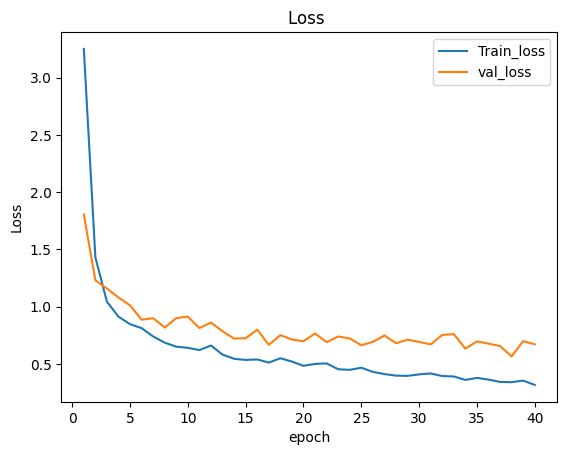

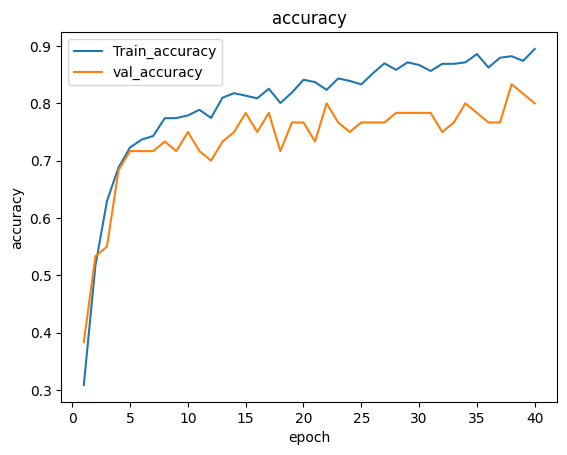

In [16]:
#  eğitim sırasında kaydedilen eğitim kaybı ve doğruluk verilerine dayanarak grafiği çizmek icin
def plot_loss(history, n_epoch):
    epoch = [x for x in range(1, n_epoch+1)]
    plt.plot(epoch, history['train_loss'], label='Train_loss')
    plt.plot(epoch, history['val_loss'], label='val_loss')
    plt.title('Loss ')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend();
    plt.show()

def plot_accuracy(history, n_epoch):
    epoch = [x for x in range(1, n_epoch+1)]
    plt.plot(epoch, history['train_accuracy'], label='Train_accuracy')
    plt.plot(epoch, history['val_accuracy'], label='val_accuracy')
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend();
    plt.show()
plot_loss(history_mineral, epoch)
plot_accuracy(history_mineral, epoch)

# confusion matrisi 1

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.83      0.91         6
           2       0.67      0.67      0.67         3
           3       0.75      0.67      0.71         9
           4       0.67      0.75      0.71         8
           5       0.79      0.92      0.85        12
           6       1.00      0.50      0.67         4
           7       0.50      0.40      0.44         5
           8       1.00      0.86      0.92         7

    accuracy                           0.77        60
   macro avg       0.78      0.73      0.74        60
weighted avg       0.78      0.77      0.76        60



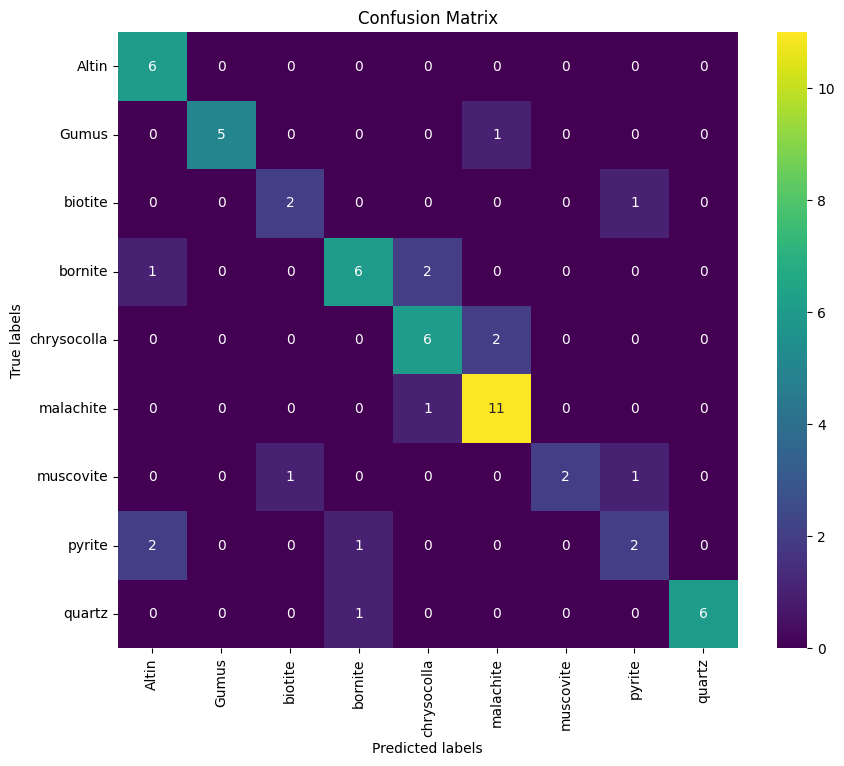

In [17]:

val_data = next(iter(val_loader)) 

val_data = [d.to(device) for d in val_data]
val_predictions = model_MM(val_data[0])  
val_predictions = torch.argmax(val_predictions, dim=1)

cm = confusion_matrix(val_data[1].cpu(), val_predictions.cpu())  
# Sınıflandırma raporunu yazdır

print(classification_report(val_data[1].cpu(), val_predictions.cpu()))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="viridis", fmt="d", xticklabels=target_label, yticklabels=target_label)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
